# Определение перспективного тарифа для телеком-компании

**Описание проекта**
Вы аналитик компании — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».

**Описание тарифов**

**Тариф «Смарт»**
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

**Примечание:**
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**Наша задача** — сделать предварительный анализ тарифов на небольшой выборке клиентов. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Результаты исследования** позволят скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

**Ход исследования**
В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.



## Изучение данных из файлов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df_calls = pd.read_csv('/datasets/____.csv')
df_internet = pd.read_csv('/datasets/____.csv')
df_messages = pd.read_csv('/datasets/____.csv')
df_tariffs = pd.read_csv('/datasets/____.csv')
df_users = pd.read_csv('/datasets/____.csv')

### Изучение данных из файла  `calls`

In [3]:
display(df_calls.head(5))
df_calls.info()
df_calls.duplicated().sum()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


0

В таблице 4 столбца. Типы данных в столбцах — `object`, `float64`, `int64`.  
В названиях колонок нарушения стиля не выявлены.  
В данных отсутствуют пропущенные значения.

Необходимо устранить следующие моменты:
* тип данных в столбце `call_date` должен быть `datetime64`;
* тип данных в столбце `duration` должен быть `int64`, т.к. по тех. заданию значения в секундах должны быть округлены в большую сторону до полных минут.

### Изучение данных из файла  `internet`

In [4]:
display(df_internet.head(5))
df_internet.info()
df_internet.duplicated().sum()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


0

В таблице 4 столбца. Типы данных в столбцах — `object`, `float64`, `int64`.  
В названиях колонок нарушения стиля не выявлены.  
В данных отсутствуют пропущенные значения.

Необходимо устранить следующие моменты:
* тип данных в столбце `session_date` должен быть `datetime64`.

### Изучение данных из файла  `messages`

In [5]:
display(df_messages.head(5))
df_messages.info()
df_messages.duplicated().sum()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


0

В таблице 3 столбца. Типы данных в столбцах — `object`, `int64`.  
В названиях колонок нарушения стиля не выявлены.  
В данных отсутствуют пропущенные значения.

Необходимо устранить следующие моменты:
* тип данных в столбце `message_date` должен быть `datetime64`.

### Изучение данных из файла  `tariffs`

In [6]:
display(df_tariffs.head(5))
df_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице 8 столбцов. Типы данных в столбцах — `object`, `int64`.  
В названиях колонок нарушения стиля не выявлены.  
В данных отсутствуют пропущенные значения.
Все данные в порядке.

### Изучение данных из файла  `users`

In [7]:
display(df_users.head(5))
df_users.info()
df_users.duplicated().sum()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


0

В таблице 8 столбцов. Типы данных в столбцах — `object`, `int64`.  
В названиях колонок нарушения стиля не выявлены.  
В данных имеются пропущенные значения в столбце `churn_date`. Согласно спецификации churn_date — это дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Заполнение пропусков не требуется.

Необходимо устранить следующие моменты:
* тип данных в столбце `reg_date` должен быть `datetime64`.

## Обработка данных

Для начала напишем необходимые функции для обработки и предварительного анализа данных

In [8]:
#функция, которая будет изменять типы данных в столбцах с датами (кроме столбца churn_date) и добавлять столбец month
def month(datas):
    for data in datas:
        for column in data.columns:
            if 'date' in column and column != 'churn_date':
                data[column] = pd.to_datetime(data[column], format='%Y-%m-%d')
                data['month'] = data[column].apply(lambda x: x.month)               

In [9]:
#вызовим функцию month
month([df_calls, df_internet, df_messages, df_users])

#округлим значения и изменим тип данных в столбце duration 
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

#проверим
display(df_calls.head())
df_calls.info()
df_internet.info()
df_messages.info()
df_users.info()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
 5   month        

Все изменения внесены.

## Расчеты данных для каждого пользователя

### Формирование сводной таблицы

Для того, чтобы расчитать данные для каждого пользователя, сформируем сводную таблицу с необходимыми данными.

In [10]:
#посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам
quantity_of_calls = df_calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum']).reset_index()
#посчитаем количество отправленных сообщений по месяцам
quantity_of_mesages = df_messages.groupby(['user_id', 'month'])['id'].agg(['count']).reset_index()
#посчитаем объем израсходованного интернет-трафика по месяцам в мегабайтах
quantity_of_internet = df_internet.groupby(['user_id', 'month'])['mb_used'].agg(['sum']).reset_index()

#округлим полученные значения в мегабайтах до гигабайт
quantity_of_internet['sum'] = np.ceil(quantity_of_internet['sum'] / 1024)

#сведем полученные данные в единую таблицу
data = quantity_of_calls.merge(quantity_of_mesages, on=['user_id', 'month'], how='outer')
data = data.merge(quantity_of_internet, on=['user_id', 'month'], how='outer')
#поменяем названия столбцов
data.columns = ['user_id', 'month', 'calls', 'calls_duration', 'messages', 'gb_used']
#добавим данные пользователей
data = data.merge(df_users, on='user_id', how='outer')
#переименуем название столбца month_y
data = data.rename(columns={'month_x': 'month', 'month_y': 'reg_month'})
#посмотрим полученную сводную тадлицу
display(data.head(10))
data.describe()
data.info()

,user_id,month,calls,calls_duration,messages,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
0,1000,5.0,22.0,159.0,22.0,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1000,6.0,43.0,172.0,60.0,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
2,1000,7.0,47.0,340.0,75.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
3,1000,8.0,52.0,408.0,81.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
4,1000,9.0,58.0,466.0,57.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
5,1000,10.0,57.0,350.0,73.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
6,1000,11.0,43.0,338.0,58.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
7,1000,12.0,46.0,333.0,70.0,10.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
8,1001,11.0,59.0,430.0,NaN,18.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
9,1001,12.0,63.0,414.0,NaN,14.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3216 non-null   int64         
 1   month           3214 non-null   float64       
 2   calls           3174 non-null   float64       
 3   calls_duration  3174 non-null   float64       
 4   messages        2717 non-null   float64       
 5   gb_used         3203 non-null   float64       
 6   age             3216 non-null   int64         
 7   churn_date      189 non-null    object        
 8   city            3216 non-null   object        
 9   first_name      3216 non-null   object        
 10  last_name       3216 non-null   object        
 11  reg_date        3216 non-null   datetime64[ns]
 12  tariff          3216 non-null   object        
 13  reg_month       3216 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(5)
me

Выявлены пропущенные значения в столбцах `calls`, `calls_duration`, `messages`, `gb_used`.

Пользователи не всегда могут пользоваться всеми услугами оператора сотовой связи, поэтому заполним пропуски нулевыми значениями.

In [11]:
columns_to_replace = ['calls', 'calls_duration', 'messages', 'gb_used']
for column in columns_to_replace:
    data[column] = data[column].fillna(0)

#проверим изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3216 non-null   int64         
 1   month           3214 non-null   float64       
 2   calls           3216 non-null   float64       
 3   calls_duration  3216 non-null   float64       
 4   messages        3216 non-null   float64       
 5   gb_used         3216 non-null   float64       
 6   age             3216 non-null   int64         
 7   churn_date      189 non-null    object        
 8   city            3216 non-null   object        
 9   first_name      3216 non-null   object        
 10  last_name       3216 non-null   object        
 11  reg_date        3216 non-null   datetime64[ns]
 12  tariff          3216 non-null   object        
 13  reg_month       3216 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(5)
me

Данных полученной сводной таблицы достаточно для дальнейших расчетов.

### Помесячная выручка с каждого пользователя

Для расчета помесячной выручки с каждого пользователя необходимо:
1. Вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;
2. Умножить остаток на значение из тарифного плана;
3. Прибавить абонентскую плату, соответствующую тарифному плану.

In [12]:
#функции для расчета перелимитов
def calls_over_limit(row):
    if (row['tariff'] == 'smart'):
        result = row['calls_duration'] - df_tariffs['minutes_included'][0]
        if result > 0:
            return result
        else:
            return 0
    else:
        result = row['calls_duration'] - df_tariffs['minutes_included'][1]
        if result > 0:
            return result
        else:
            return 0

def internet_over_limit(row):
    if (row['tariff'] == 'smart'):
        result = row['gb_used'] - df_tariffs['mb_per_month_included'][0] / 1024
        if result > 0:
            return result
        else:
            return 0
    else:
        result = row['gb_used'] - df_tariffs['mb_per_month_included'][1] / 1024
        if result > 0:
            return result
        else:
            return 0

def messages_over_limit(row):
    if (row['tariff'] == 'smart'):
        result = row['messages'] - df_tariffs['messages_included'][0]
        if result > 0:
            return result
        else:
            return 0
    else:
        result = row['messages'] - df_tariffs['messages_included'][1]
        if result > 0:
            return result
        else:
            return 0

In [13]:
data['calls_over_limit'] = data.apply(calls_over_limit, axis=1)
data['internet_over_limit'] = data.apply(internet_over_limit, axis=1)
data['messages_over_limit'] = data.apply(messages_over_limit, axis=1)

In [14]:
data.head()

,user_id,month,calls,calls_duration,messages,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,calls_over_limit,internet_over_limit,messages_over_limit
0,1000,5.0,22.0,159.0,22.0,3.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0,0.0,0.0
1,1000,6.0,43.0,172.0,60.0,23.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0,0.0,0.0
2,1000,7.0,47.0,340.0,75.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0,0.0,0.0
3,1000,8.0,52.0,408.0,81.0,14.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0,0.0,0.0
4,1000,9.0,58.0,466.0,57.0,15.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0,0.0,0.0


Все необходимые столбцы добавлены.

In [15]:
#функция для подсчета выручки
def total_income(row):
    total_income = 0
    if (row['tariff'] == 'smart'):
        total_income += row['calls_over_limit'] * df_tariffs['rub_per_minute'][0]
        total_income += row['internet_over_limit'] * df_tariffs['rub_per_gb'][0]
        total_income += row['messages_over_limit'] * df_tariffs['rub_per_message'][0] 
        total_income += df_tariffs['rub_monthly_fee'][0]
        return total_income
    else:
        total_income += row['calls_over_limit'] * df_tariffs['rub_per_minute'][1]
        total_income += row['internet_over_limit'] * df_tariffs['rub_per_gb'][1]
        total_income += row['messages_over_limit'] * df_tariffs['rub_per_message'][1] 
        total_income += df_tariffs['rub_monthly_fee'][1]
        return total_income

In [16]:
data['total_income'] = data.apply(total_income, axis=1)

In [17]:
data.sample(10)

,user_id,month,calls,calls_duration,messages,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,calls_over_limit,internet_over_limit,messages_over_limit,total_income
1858,1296,10.0,40.0,316.0,45.0,15.0,60,NaN,Москва,Альфред,Черный,2018-06-05,smart,6,0.0,0.0,0.0,550.0
2938,1462,12.0,136.0,878.0,0.0,24.0,72,NaN,Тольятти,Алёна,Абрамычева,2018-10-29,smart,10,378.0,9.0,0.0,3484.0
96,1012,11.0,25.0,206.0,25.0,22.0,38,NaN,Санкт-Петербург,Варлам,Соловьев,2018-03-28,smart,3,0.0,7.0,0.0,1950.0
1400,1222,10.0,196.0,1322.0,133.0,27.0,44,NaN,Уфа,Пётр,Булгаков,2018-08-30,ultra,8,0.0,0.0,0.0,1950.0
945,1152,5.0,41.0,345.0,0.0,27.0,44,NaN,Мурманск,Марина,Щербакова,2018-02-05,ultra,2,0.0,0.0,0.0,1950.0
1056,1169,12.0,41.0,281.0,13.0,11.0,52,NaN,Сочи,Георгина,Карташова,2018-06-25,smart,6,0.0,0.0,0.0,550.0
1821,1291,9.0,78.0,526.0,0.0,9.0,73,NaN,Москва,Мануэла,Анищенко,2018-02-08,smart,2,26.0,0.0,0.0,628.0
671,1109,2.0,16.0,99.0,0.0,3.0,64,NaN,Санкт-Петербург,Екатерина,Андрющенко,2018-02-23,smart,2,0.0,0.0,0.0,550.0
1861,1297,12.0,47.0,404.0,0.0,19.0,66,NaN,Иркутск,Радим,Абрамцев,2018-12-04,smart,12,0.0,4.0,0.0,1350.0
831,1134,4.0,69.0,419.0,44.0,17.0,65,NaN,Красноярск,Марьяна,Авросимова,2018-01-16,smart,1,0.0,2.0,0.0,950.0


Выручка для каждого пользователя и месяца посчитана и добавлена в таблицу.

## Анализ полученных данных для каждого пользователя

In [18]:
#функция для анализа поведения клиентов оператора
def hist_maker_and_table(df, name, x_1_smart, x_2_ultra):
    cd = df.groupby(df.tariff)[name]
    cd_desc = cd.describe(percentiles = [.01,.25,.75,.99])
    cd_desc['var']= [np.var(cd.get_group('smart'), ddof=1), np.var(cd.get_group('ultra'), ddof=1)]
    display(cd_desc)
    smart = df.query('tariff == "smart"')[name]
    ultra = df.query('tariff == "ultra"')[name]
    plt.figure(figsize=(10,6))
    plt.hist(smart, bins=50, color='blue', edgecolor='grey', alpha=0.5, label = 'smart', density = False)
    plt.hist(ultra, bins=50, color='orange', edgecolor='grey', alpha=0.5,label = 'ultra', density = False)
    plt.axvline(cd_desc['mean'][0], color='blue', linestyle='dashed', linewidth=3, label='Mean smart: {:.2f}'.format(cd_desc['mean'][0]))
    
    plt.axvline(cd_desc['mean'][1], color='orange', linestyle='dashed', linewidth=3, label='Mean ultra: {:.2f}'.format(cd_desc['mean'][1]))

    plt.axvline(x_1_smart, color='blue', linestyle='solid', linewidth=3, label='Included in tariff smart')
    plt.axvline(x_2_ultra, color='orange', linestyle='solid', linewidth=3, label='Included in tariff ultra')
    plt.legend()
    plt.title('Histogram {}'.format(name))

### Сравнение длительности звонков

СРАВНЕНИЕ ТАРИФА СМАРТ И УЛЬТРА


<AxesSubplot:>

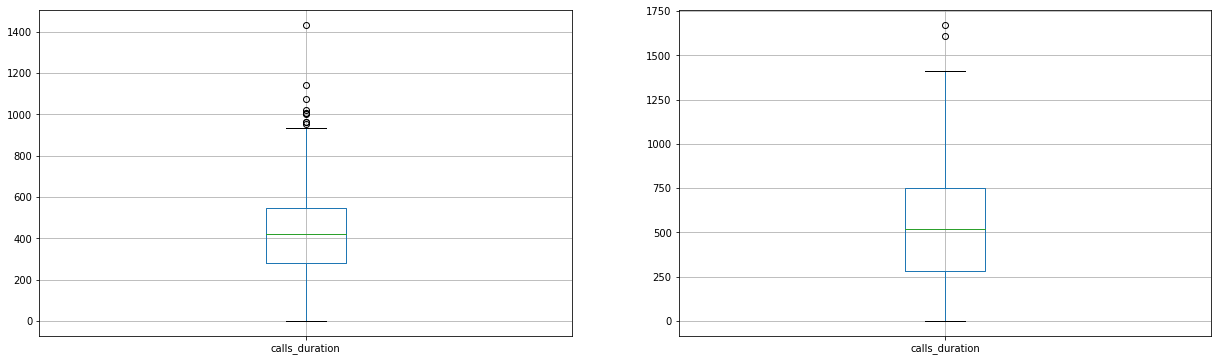

In [19]:
print('СРАВНЕНИЕ ТАРИФА СМАРТ И УЛЬТРА')
fig = plt.figure(figsize = (21,6))
data[data['tariff'] == 'smart'].boxplot('calls_duration', ax = plt.subplot(1,2,1));
data[data['tariff'] == 'ultra'].boxplot('calls_duration', ax = plt.subplot(1,2,2))


,count,mean,std,min,1%,25%,50%,75%,99%,max,var
tariff,,,,,,,,,,,
smart,2230.0,417.747534,190.476754,0.0,13.58,282.0,421.5,545.00,872.71,1435.0,36281.393836
ultra,986.0,526.089249,317.887549,0.0,0.00,282.5,518.0,751.75,1291.05,1673.0,101052.493549


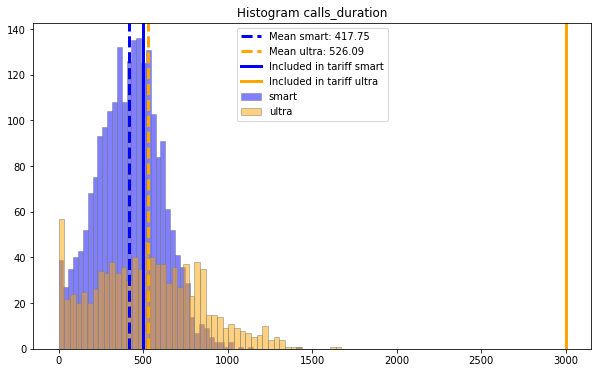

In [20]:
hist_maker_and_table(data,'calls_duration',500,3000)

Минимальная длительность звонков составляет 0 минуты. Т.к. в документации не указано какие звонки фиксируются как 0, либо это пропущенные звонки, либо отклоненные, оставим эти значения как есть.

Максимальная длительность звонков составляет 1673 минуты, поэтому поменяем границу графика до 1700.

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
tariff,,,,,,,,,,,
smart,2230.0,417.747534,190.476754,0.0,13.58,282.0,421.5,545.00,872.71,1435.0,36281.393836
ultra,986.0,526.089249,317.887549,0.0,0.00,282.5,518.0,751.75,1291.05,1673.0,101052.493549


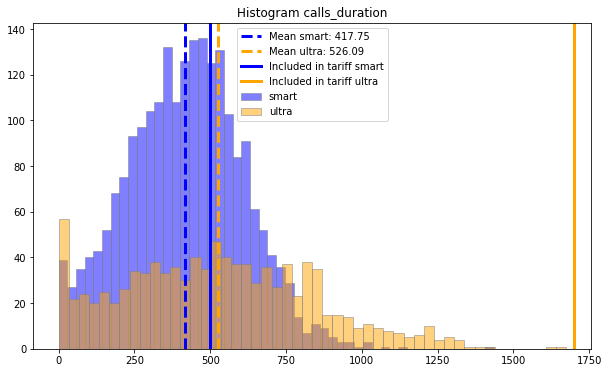

In [21]:
hist_maker_and_table(data,'calls_duration',500,1700)

Выводы:
- Пользователи тарифа "Смарт" в среднем в месяц тратят меньше минут разговора, чем пользователи тарифа "Ультра".
- На тарифе "Смарт" пользователи часто не укладываются в лимиты и доплачивают за звонки.
- Дисперсия и стандартное отклонение выше на тарифе "Ультра", но пользователи этого тарифа всегда укладываются в установленные лимиты. Максимальное число минут разговора в месяц значительно меньше заложенных в него 3000.

### Сравнение количества сообщений

СРАВНЕНИЕ ТАРИФА СМАРТ И УЛЬТРА


<AxesSubplot:>

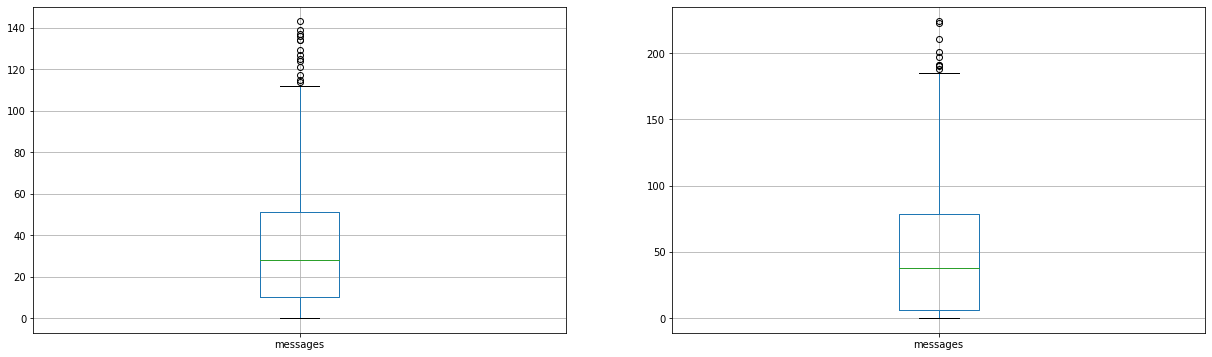

In [22]:
print('СРАВНЕНИЕ ТАРИФА СМАРТ И УЛЬТРА')
fig = plt.figure(figsize = (21,6))
data[data['tariff'] == 'smart'].boxplot('messages', ax = plt.subplot(1,2,1));
data[data['tariff'] == 'ultra'].boxplot('messages', ax = plt.subplot(1,2,2))

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
tariff,,,,,,,,,,,
smart,2230.0,33.369058,28.230396,0.0,0.0,10.0,28.0,51.00,108.0,143.0,796.955256
ultra,986.0,49.313387,47.806040,0.0,0.0,6.0,38.0,78.75,183.3,224.0,2285.417425


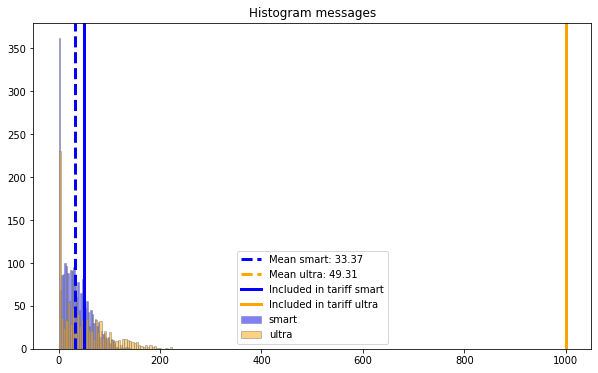

In [23]:
hist_maker_and_table(data,'messages',50,1000)

Максимальное количество сообщений 224, поэтому поменяем границу графика до 230.

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
tariff,,,,,,,,,,,
smart,2230.0,33.369058,28.230396,0.0,0.0,10.0,28.0,51.00,108.0,143.0,796.955256
ultra,986.0,49.313387,47.806040,0.0,0.0,6.0,38.0,78.75,183.3,224.0,2285.417425


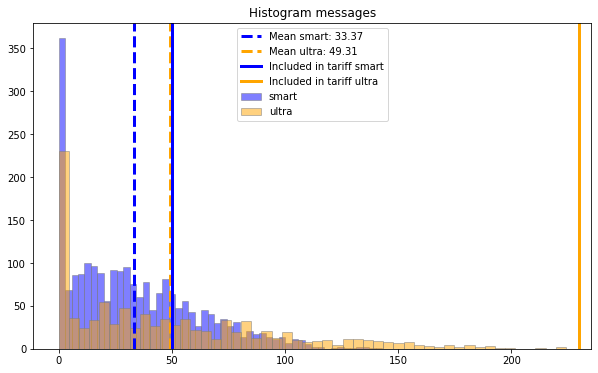

In [24]:
hist_maker_and_table(data,'messages',50,230)

Выводы:
- Пользователи тарифа "Смарт" в среднем в месяц отправляют меньше сообщений, чем пользователи тарифа "Ультра".
- На тарифе "Смарт" пользователи часто не укладываются в лимиты и доплачивают за сообщения.
- Дисперсия и стандартное отклонение выше на тарифе "Ультра", но пользователи этого тарифа всегда укладываются в установленные лимиты. Максимальное число сообщений в месяц значительно меньше заложенных в него 1000.

### Сравнение объёма интернет-трафика

СРАВНЕНИЕ ТАРИФА СМАРТ И УЛЬТРА


<AxesSubplot:>

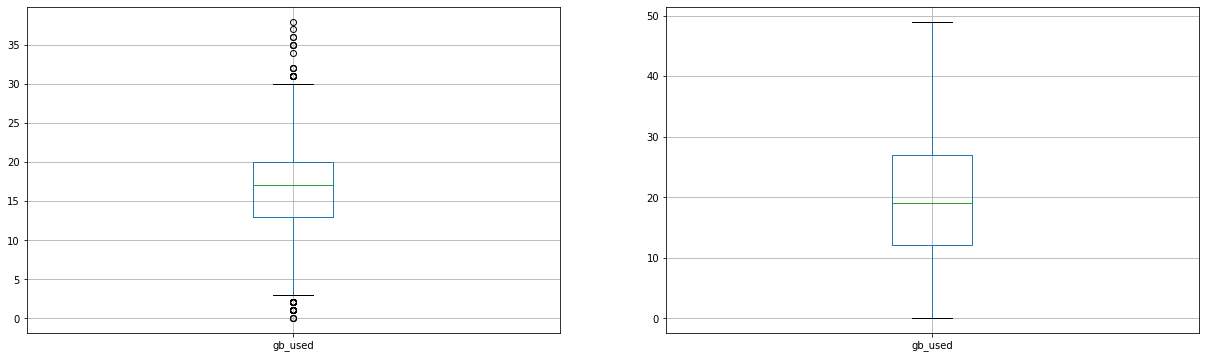

In [25]:
print('СРАВНЕНИЕ ТАРИФА СМАРТ И УЛЬТРА')
fig = plt.figure(figsize = (21,6))
data[data['tariff'] == 'smart'].boxplot('gb_used', ax = plt.subplot(1,2,1))
data[data['tariff'] == 'ultra'].boxplot('gb_used', ax = plt.subplot(1,2,2))

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
tariff,,,,,,,,,,,
smart,2230.0,16.321525,5.756167,0.0,2.0,13.0,17.0,20.0,29.71,38.0,33.133453
ultra,986.0,19.474645,9.868057,0.0,0.0,12.0,19.0,27.0,42.15,49.0,97.378544


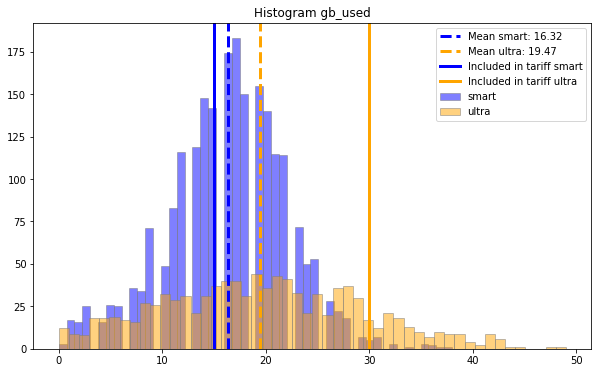

In [26]:
hist_maker_and_table(data,'gb_used',15,30)

Выводы:
- Пользователи тарифа "Ультра" в среднем в месяц используют бОльший объём интернет-трафика, чем пользователи тарифа "Смарт".
- Пользователи тарифа "Смарт" не укладываются в лимит и доплачивают за интернет-трафик.
- Дисперсия и стандартное отклонение выше на тарифе "Ультра", пользователи этого тарифа укладываются в установленный лимит интернет-трафика.

### Сравнение выручки

In [27]:
total_income = data['total_income'].sum()
smart_total_income = data.query('tariff == "smart"')['total_income'].sum()
ultra_total_income = data.query('tariff == "ultra"')['total_income'].sum()

(-1.1090684501231578,
 1.1004318309582457,
 -1.1240987710468748,
 1.1126139973885787)

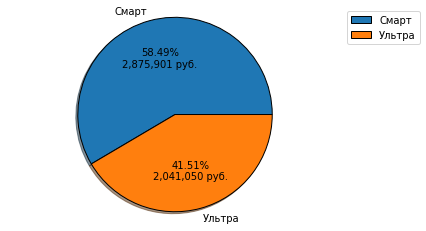

In [28]:
def calculate(percent):
    tariff_income = float(percent / 100 * total_income)
    return "{:.2f}%\n{:,.0f} руб.".format(percent, tariff_income)

vals = [smart_total_income, ultra_total_income]
labels = ['Смарт', 'Ультра']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct=lambda percent: calculate(percent), shadow=True, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
ax.axis('equal')


Больше всего выручки приносит тарифный план "Смарт".

In [29]:
total_users = data['user_id'].nunique()
smart_total_users = data.query('tariff == "smart"')['user_id'].nunique()
ultra_total_users = data.query('tariff == "ultra"')['user_id'].nunique()

Посмотрим на долю абонентов по кажому тарифу.

(-1.117662280159802, 1.1008410917079483, -1.113350971551862, 1.113118503297419)

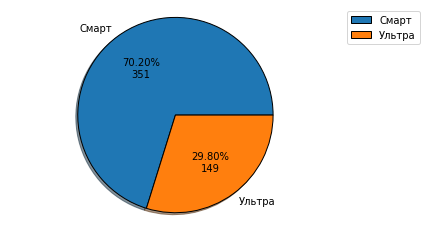

In [30]:
def calculate(percent):
    tariff_users = float(percent / 100 * total_users)
    return "{:.2f}%\n{:,.0f}".format(percent, tariff_users)

vals = [smart_total_users, ultra_total_users]
labels = ['Смарт', 'Ультра']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct=lambda percent: calculate(percent), shadow=True, wedgeprops={'lw':1, 'ls':'-','edgecolor':"k"})
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
ax.axis('equal')

Основная доля абонентов применяет тариф "Смарт".

### Выводы

Несмотря на то, абонентская плата за тарифный план "Ультра" в 3,5 раза дороже "Смарт", 58,49% выручки формируется за счет тарифного плана "Смарт" благодаря:
- перелимиту пользователями данного тарифа за звонки, сообщения и интернет-трафик;
- бОльшему числу абонентов данного тарифа (70,20% от общего количества).

## Проверка гипотез

### Гипотеза 1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Н0 (нулевая гипотеза) - Средняя выручка пользователей тарифов «Ультра» и «Смарт» **равны**, т.е. средние значения равны.

Н1 (альтернативная гипотеза) - Средняя выручка пользователей тарифов «Ультра» и «Смарт» **не равны**, т.е. средние значения не равны.

Дисперсии выборок были расчитаны выше, они отличаются более чем на 5%.

Выборки независимы, поэтому используем функцию ttest_ind.

In [31]:
sample_ultra = data[data['tariff'] == 'ultra']['total_income'] 
sample_smart= data[data['tariff'] == 'smart']['total_income'] 
results = st.ttest_ind( sample_ultra, sample_smart)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  8.081909555489933e-161
Принимаем альтернативную гипотезу


p-значение достаточно мало, что дает основание отвергнуть предположение об отсутствии различий между выручками у разных тарифных планов, т.е. маловероятна случайность результатов теста гипотезы.

In [32]:
print('Средняя выручка пользователя "Ультра" - {:,.2f} руб.'.format(sample_ultra.mean()))
print('Средняя выручка пользователя "Смарт" - {:,.2f} руб.'.format(sample_smart.mean()))

Средняя выручка пользователя "Ультра" - 2,070.03 руб.
Средняя выручка пользователя "Смарт" - 1,289.64 руб.


Несмотря на перелимит пользователями тарифа Smart за звонки, сообщения и интернет-трафик, с одного пользователя тарифа Ultra в среднем получают больше выручки, чем от пользователя тарифа Smart, благодаря повышенной стоимости абонентской платы (в 3,5 раза больше).

### Гипотеза 2: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Н0 (нулевая гипотеза) - Средняя выручка пользователей из Москвы и других регионов **равны**, т.е. средние значения равны.

Н1 (альтернативная гипотеза) - Средняя выручка пользователей из Москвы и других регионов **не равны**, т.е. средние значения не равны.

Дисперсии выборок были расчитаны выше, они отличаются более чем на 5%.

Выборки независимы, поэтому используем функцию ttest_ind.

In [33]:
sample_moscow = data[data['city'] == 'Москва']['total_income'] 
sample_others = data[data['city'] != 'Москва']['total_income'] 
results = st.ttest_ind(sample_moscow, sample_others)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  0.5400751614511182
Опровергнуть нулевую гипотезу нельзя


p-значение достаточно высоко, что не дает основание отвергнуть предположение об отсутствии различий между выручками у разных тарифных планов.

In [34]:
print('Средняя выручка пользователя из Москвы - {:,.2f} руб.'.format(sample_moscow.mean()))
print('Средняя выручка пользователя из других регионов - {:,.2f} руб.'.format(sample_others.mean()))

Средняя выручка пользователя из Москвы - 1,546.71 руб.
Средняя выручка пользователя из других регионов - 1,524.73 руб.


Разница между средними выручками пользователей из Москвы и других регионов составляет 21,98 руб., что не так существенно.

## Общий вывод

58,49% выручки приносят пользователи тарифа "Смарт" за счет:
- перелимитов за звонки, сообщения и интернет-трафик;
- бОльшему числу абонентов данного тарифа (70,20% от общего количества).

При этом средняя выручка пользователей тарифов "Ультра" и "Смарт" сильно различаются:
- средняя выручка пользователя "Ультра" составляет 2,070.03 руб.
- средняя выручка пользователя "Смарт" составляет 1,289.64 руб.

Данная разница обусловлена повышенной стоимостью абон.платы за тариф "Ультра" (в 3,5 раза больше).

Вывод: Тариф "Ультра" в среднем приносит в 1,6 раза больше выручки чем тариф "Смарт".

Рекомендации:
Создать новый промежуточный тарифный план для удовлетворения потребностей пользователей "Смарт", которые часто выходят за пределы установленных лимитов.